# Import libraries

In [255]:
import os
import pandas as pd
import seaborn as sns
import scipy.stats as st

# Load the data

In this project we analyzed the dataset about last 120 years olympic champions.   
The dataset splitted to some files with tables. 

The dataset has the following features:

* ID – Unique number for each athlete
* Name – Athlete's name
* Sex – M or F
* Age – Integer
* Height – In centimeters
* Weight – In kilograms
* Team – Team name
* NOC – National Olympic Committee 3-letter code
* Games – Year and season
* Year – Integer
* Season – Summer or Winter
* City – Host city
* Sport – Sport
* Event – Event
* Medal – Gold, Silver, Bronze, or NA

### Task 1

In [ ]:
####### !!!!!!!! добавить чтение не только csv

In [75]:
def unite_table(direct, extension):
    one_table = pd.DataFrame()
    file_names = os.listdir(direct)
    
    for file in file_names:
        try:
            if file.endswith(extension):
                adding_table = pd.read_csv(os.path.join(direct, file))
                one_table = pd.concat([one_table, adding_table], axis=0)
        except:
            pass
    
    return one_table

In [76]:
direct = '/Users/emulciber/IB/statistics_and_r/BI_stats_2022/project_1/data/athlete_events/'
extension = 'csv'

In [78]:
olympics = unite_table(direct, extension)

### Задание 2

In [ ]:
# !!!!!!!!!!! Пробежаться еще раз с проверкой (см текстовый файл с опиисанием данных)

In [ ]:
# Проверяем, корректно ли загружена таблица, визуально знакомимся с данными таблицы

In [86]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN


In [ ]:
# Вызываем типы и количество объектов, содержащихся в столбцах таблицы

In [85]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271115 entries, 0 to 22390
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271115 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271113 non-null  object 
 3   Age     261639 non-null  float64
 4   Height  210943 non-null  float64
 5   Weight  208239 non-null  float64
 6   Team    271112 non-null  object 
 7   NOC     271111 non-null  object 
 8   Games   271110 non-null  object 
 9   Year    271108 non-null  float64
 10  Season  271108 non-null  object 
 11  City    271108 non-null  object 
 12  Sport   271108 non-null  object 
 13  Event   271107 non-null  object 
 14  Medal   39782 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 33.1+ MB


In [ ]:
# Числовым столбцам соответствуют числовые типы, столбцы с текстом содержат данные object. Все корректно. Однако, во многих столбцам есть пропущенные значения.

In [ ]:
# Вызываем описательные характеристики числовых столбцов

In [84]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271115.000000,261639.000000,210943.000000,208239.000000,271108.000000
mean,68248.828641,25.557669,175.339760,70.702232,1978.378314
std,39022.303374,6.407296,10.524619,14.348878,29.877579
min,1.000000,10.000000,127.000000,7.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,240.000000,340.000000,214.000000,2016.000000


In [ ]:
# Плюс-минус все соответствует норме, кроме минимального значения веса - в 7 кг

In [87]:
olympics[olympics['Weight'] == 7]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22642,68370,Helmut Lehmann,M,25.0,178.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Вес в этой строке, судя по всему, указан с ошибкой. Также, видим много пропущенных значений, тем более пришло время от них избавиться. Поскольку пропущенные значения не слишком частое явление, мы можем просто убрать строки с ними, т.к. заполнение пропущенных значений, например, средним, это не слишком корректный метод, хотя и может использоваться в крайних случаях, когда данных мало и они "дырявые". Не забываем также, что убирать значения надо из столбцов, кроме "Medal".

In [88]:
len(olympics)

271115

In [93]:
olympics_col = list(olympics.columns)[:-1]

In [95]:
olympics = olympics.dropna(subset=olympics_col)

In [96]:
len(olympics)

206159

In [ ]:
# Итого мы лишились около 70 000 записей, что довольно много, однако все еще кажется мне допустимым в сравнении с общим количеством. Еще раз проверим описательные статистики числовых столбцов

In [97]:
olympics.describe() ## ПОЧЕМУ РОСТ 340????? ВЕС 214?????

,ID,Age,Height,Weight,Year
count,206159.000000,206159.000000,206159.000000,206159.000000,206159.000000
mean,68616.133198,25.055511,175.372887,70.688692,1989.674591
std,38996.513955,5.483134,10.552392,14.340543,20.130946
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,340.000000,214.000000,2016.000000


In [ ]:
# Выглядит значительно лучше. Необходимо также проверить значения в столбцах с категориями, для этого посмотрим на списки значений в таких столбцах и удалим единично встречающиеся неопознаваемые варианты

In [103]:
olympics['Sex'].value_counts()

M    139449
F     66709
G         1
Name: Sex, dtype: int64

In [ ]:
# Есть единичное значение, которое выпадает из общего массива значений. Уберем его

In [115]:
olympics = olympics[olympics['Sex'] != 'G']

In [118]:
olympics['Games'].value_counts()

2000 Summer    13681
2016 Summer    13443
2008 Summer    13402
2004 Summer    13398
2012 Summer    12523
1996 Summer    11837
1988 Summer    11618
1992 Summer    10326
1972 Summer     9846
1984 Summer     8916
1968 Summer     8402
1976 Summer     8265
1960 Summer     7525
1964 Summer     7368
1980 Summer     6843
2014 Winter     4673
2010 Winter     4378
2006 Winter     4365
2002 Winter     4060
1998 Winter     3518
1994 Winter     2971
1992 Winter     2783
1956 Summer     2261
1988 Winter     2018
1984 Winter     1951
1952 Summer     1914
1968 Winter     1801
1972 Winter     1635
1980 Winter     1374
1964 Winter     1343
1976 Winter     1302
1948 Summer      914
1936 Summer      827
1928 Summer      622
1912 Summer      551
1924 Summer      543
1960 Winter      512
1932 Summer      449
1920 Summer      428
1908 Summer      366
1956 Winter      334
1906 Summer      201
1952 Winter      144
1904 Summer      119
1948 Winter      102
1900 Summer       71
1936 Winter       69
1928 Winter  

In [119]:
olympics['Season'].value_counts()

Summer    166699
Winter     39459
Name: Season, dtype: int64

In [120]:
olympics['City'].value_counts()

London                    13803
Sydney                    13681
Athina                    13639
Rio de Janeiro            13443
Beijing                   13402
Atlanta                   11837
Seoul                     11618
Barcelona                 10326
Munich                     9846
Los Angeles                9365
Mexico City                8402
Montreal                   8265
Roma                       7525
Tokyo                      7368
Moskva                     6843
Sochi                      4673
Vancouver                  4378
Torino                     4365
Salt Lake City             4060
Nagano                     3518
Lillehammer                2971
Albertville                2783
Innsbruck                  2645
Melbourne                  2155
Calgary                    2018
Sarajevo                   1951
Helsinki                   1914
Grenoble                   1801
Sapporo                    1635
Lake Placid                1417
Berlin                      827
Stockhol

In [121]:
olympics['Medal'].value_counts()

Gold      10167
Bronze    10148
Silver     9865
Name: Medal, dtype: int64

In [ ]:
# Остальные столбцы кажутся в порядке. Столбцы с именами, командами и странами содержат очень большое количество значений, в т.ч. единичных, поэтому их не оцениваем.

### Задание 3

In [127]:
youngest_fem_1992 = min(olympics[(olympics['Year'] == 1992) & (olympics['Sex'] == 'F')]['Age'])
print('Возраст самого молодого спортсмена женского пола в 1992 году:', youngest_fem_1992)

Возраст самого молодого спортсмена женского пола в 1992 году: 12.0


In [128]:
youngest_male_1992 = min(olympics[(olympics['Year'] == 1992) & (olympics['Sex'] == 'M')]['Age'])
print('Возраст самого молодого спортсмена мужского пола в 1992 году:', youngest_male_1992)

Возраст самого молодого спортсмена мужского пола в 1992 году: 14.0


### Задание 4

In [137]:
mean_height_fem = olympics[olympics['Sex'] == 'F']['Height'].mean()
std_height_fem = olympics[olympics['Sex'] == 'F']['Height'].std()

print(f'Среднее значение переменной Height для спортсменов женского пола: {mean_height_fem}', 
      f'Стандартное отклонение переменной Height для спортсменов женского пола: {std_height_fem}', sep='\n')

Среднее значение переменной Height для спортсменов женского пола: 167.8638564511535
Стандартное отклонение переменной Height для спортсменов женского пола: 8.793263549124246


In [138]:
mean_height_male = olympics[olympics['Sex'] == 'M']['Height'].mean()
std_height_male = olympics[olympics['Sex'] == 'M']['Height'].std()

print(f'Среднее значение переменной Height для спортсменов мужского пола: {mean_height_male}', 
      f'Стандартное отклонение переменной Height для спортсменов мужского пола: {std_height_male}', sep='\n')

Среднее значение переменной Height для спортсменов мужского пола: 178.96497644300067
Стандартное отклонение переменной Height для спортсменов мужского пола: 9.367877056152064


### Задание 5

Рассчитайте среднее значение и стандартное отклонение переменной Height у теннисисток (sex = F) на Олимпиаде 2000 года. Округлите ответ до первого знака после точки.

In [142]:
olympics[(olympics['Sex'] == 'F') & (olympics['Sport'] == 'Tennis') & (olympics['Year'] == 2000)]['Height'].mean().round(1)

171.8

In [143]:
olympics[(olympics['Sex'] == 'F') & (olympics['Sport'] == 'Tennis') & (olympics['Year'] == 2000)]['Height'].std().round(1)

6.5

### Задание 6

In [ ]:
В каком виде спорта участвовал самый тяжеловесный атлет на Олимпиаде 2006 года? (2 балла)

In [158]:
weight_max_2006 = olympics[(olympics['Year'] == 2006)]['Weight'].max()

In [161]:
olympics[(olympics['Year'] == 2006) & (olympics['Weight'] == weight_max_2006)]['Sport']

8102    Skeleton
Name: Sport, dtype: object

### Задание 7

In [ ]:
Какое количество золотых медалей было получено женщинами с 1980 по 2010 года? (2 балла)

In [165]:
len(olympics[(olympics['Year'] >= 1980) & (olympics['Year'] <= 2010) & (olympics['Sex'] == 'F') & (olympics['Medal'] == 'Gold')])

2167

### Задание 8

In [ ]:
Сколько раз спортсмен John Aalberg участвовал в Олимпийских играх в разные годы? (2 балла)

In [168]:
len(olympics[olympics['Name'] == 'John Aalberg']['Year'].unique())

2

### Задание 9

In [ ]:
Определите наименее и наиболее представленные (по числу участников) возрастные группы спортсменов на Олимпийских играх 2008 года. 
Возможные возрастные группы: [15-25), [25-35), [35-45), [45-55]. (4 балла)

In [169]:
olympics_2008 = olympics[olympics['Year'] == 2008]

In [177]:
cut_labels = ['15-24', '25-34', '35-44', '45-55']
cut_bins = [14, 24, 34, 44, 55]

<AxesSubplot: >

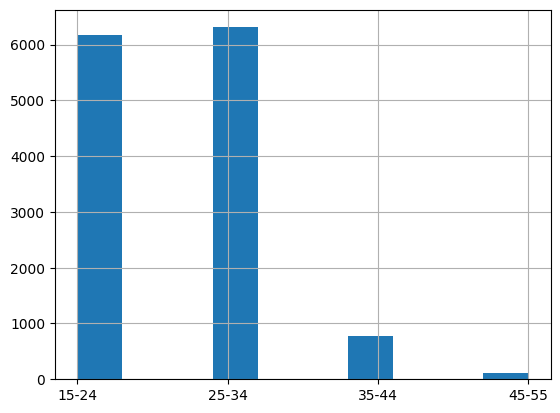

In [180]:
pd.cut(olympics_2008['Age'], bins=cut_bins, labels=cut_labels).hist()

In [181]:
# Наиболее представленные группы: [15-25), [25-35)
# Наименее представленные группы: [35-45), [45-55]

### Задание 10

In [ ]:
Насколько изменилось число видов спорта на Олимпиаде 2002 года по сравнению с Олимпийскими играми 1994 года? (2 балла)

In [183]:
len(olympics[olympics['Year'] == 2002]['Sport'].unique()) - len(olympics[olympics['Year'] == 1994]['Sport'].unique())

3

### Задание 11

In [ ]:
Выведите для зимней и летней олимпиады отдельно топ 3 стран по каждой из типов медалей (2 балла)

In [185]:
winter = olympics[olympics['Season'] == 'Winter']
summer = olympics[olympics['Season'] == 'Summer']

In [233]:
winter_group = winter.groupby('Medal')['Team'].value_counts().to_frame()
summer_group = summer.groupby('Medal')['Team'].value_counts().to_frame()

In [232]:
winter_group.loc['Bronze'].head(3)

,Team
Team,
Finland,210
Sweden,137
United States,104


In [234]:
winter_group.loc['Silver'].head(3)

,Team
Team,
United States,228
Canada,174
Finland,137


In [235]:
winter_group.loc['Gold'].head(3)

,Team
Team,
Canada,237
Soviet Union,205
United States,126


In [236]:
summer_group.loc['Bronze'].head(3)

,Team
Team,
United States,834
Soviet Union,552
Germany,484


In [237]:
summer_group.loc['Silver'].head(3)

,Team
Team,
United States,1032
Soviet Union,556
Australia,409


In [238]:
summer_group.loc['Gold'].head(3)

,Team
Team,
United States,1949
Soviet Union,756
Germany,400


### Задание 12

In [ ]:
Создайте новую переменную Height_z_scores и сохраните в нее значения переменной Height после ее стандартизации. (2 балла)

In [239]:
height_mean = olympics['Height'].mean()
height_std = olympics['Height'].std()
Height_z_scores = olympics['Height'].apply(lambda x: (x - height_mean) / height_std)

In [240]:
Height_z_scores

0        1.101848
1        1.101848
2        1.101848
3        1.101848
4        1.386143
           ...   
22386    0.343727
22387    0.059431
22388    0.059431
22389    0.912317
22390    0.912317
Name: Height, Length: 206158, dtype: float64

### Задание 13

In [ ]:
Дополнительно: Создайте новую переменную Height_min_max_scaled и сохраните в нее значения переменной Height 
после применения к ней min-max нормализации (нужно будет разобраться, как она работает). (2 балла)

In [242]:
height_min = olympics['Height'].min()
height_max = olympics['Height'].max()

In [243]:
Height_min_max_scaled = olympics['Height'].apply(lambda x: (x - height_min) / (height_max - height_min))

In [247]:
Height_min_max_scaled

0        0.281690
1        0.281690
2        0.281690
3        0.281690
4        0.295775
           ...   
22386    0.244131
22387    0.230047
22388    0.230047
22389    0.272300
22390    0.272300
Name: Height, Length: 206158, dtype: float64

### Задание 14

In [ ]:
Сравните рост, вес и возраст мужчин и женщин, участвовавших в зимних олимпийских играх. Пожалуйста, оформите результаты так, 
чтобы мы сразу могли использовать их для статьи. (5 баллов)

In [258]:
winter_male = winter[winter['Sex'] == 'M']
winter_female = winter[winter['Sex'] == 'F']

<AxesSubplot: xlabel='Sex', ylabel='Height'>

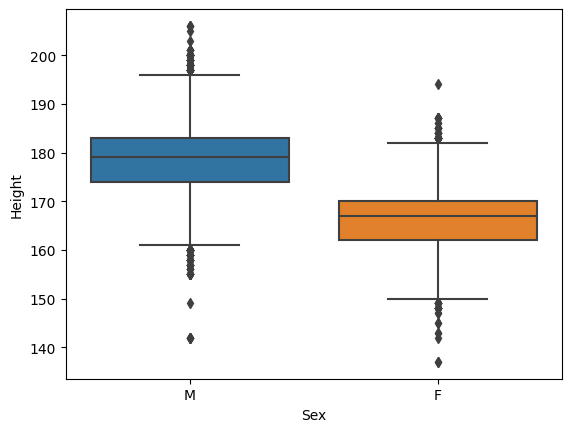

In [254]:
sns.boxplot(winter, x = 'Sex', y = 'Height')

In [262]:
print(st.shapiro(winter_male['Height']), \
      st.shapiro(winter_female['Height']), sep='\n')

ShapiroResult(statistic=0.995615541934967, pvalue=8.926407958322846e-27)
ShapiroResult(statistic=0.9962491393089294, pvalue=5.694983834653048e-18)


In [263]:
st.ttest_ind(winter_male['Height'], winter_female['Height'])

Ttest_indResult(statistic=179.06226056048396, pvalue=0.0)

<AxesSubplot: xlabel='Sex', ylabel='Weight'>

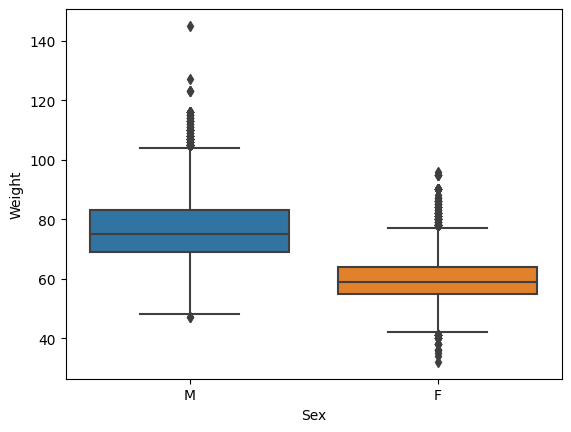

In [264]:
sns.boxplot(winter, x = 'Sex', y = 'Weight')

In [265]:
print(st.shapiro(winter_male['Weight']), \
      st.shapiro(winter_female['Weight']), sep='\n')

ShapiroResult(statistic=0.9867770671844482, pvalue=7.482933799494523e-43)
ShapiroResult(statistic=0.9866211414337158, pvalue=2.0316208455215755e-33)


/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [266]:
st.ttest_ind(winter_male['Weight'], winter_female['Weight'])

Ttest_indResult(statistic=167.18898747118823, pvalue=0.0)

<AxesSubplot: xlabel='Sex', ylabel='Age'>

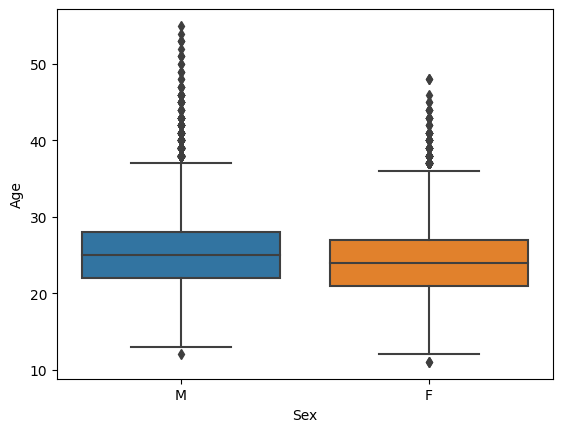

In [267]:
sns.boxplot(winter, x = 'Sex', y = 'Age')

In [268]:
print(st.shapiro(winter_male['Age']), \
      st.shapiro(winter_female['Age']), sep='\n')

ShapiroResult(statistic=0.968994140625, pvalue=0.0)
ShapiroResult(statistic=0.9805302023887634, pvalue=6.051080022155103e-39)


/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [269]:
st.ttest_ind(winter_male['Age'], winter_female['Age'])

Ttest_indResult(statistic=25.18013621336959, pvalue=8.284580329528672e-139)

### Задание 15

In [ ]:
Нас особенно интересуют переменные Team и Medal. Что ты можешь про них сказать? Есть ли у нас основания предполагать, 
что они могут быть взаимосвязаны? Как ты это определил? (5 баллов)

### Задание 16

In [ ]:
Задание “со звездочкой” (дополнительное). В нем предполагается выдвинуть и
проверить несколько гипотез в рамках тех методов, которые мы освоили (все, что
вам покажется интересным). Здесь нет правильного решения, будет оцениваться
ваше умение применять изученные методы и интерпретировать полученные
результаты. (10 баллов)